<a href="https://colab.research.google.com/github/Niharika2475/AIML-2025_B15/blob/main/2303a51955_AIML_LAB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv('/content/weather_forecast_data.csv')
df.head()

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.720338,89.592641,7.335604,50.501694,1032.378759,rain
1,27.879734,46.489704,5.952484,4.990053,992.614189,no rain
2,25.069084,83.072843,1.371992,14.855784,1007.231620,no rain
3,23.622080,74.367758,7.050551,67.255282,982.632013,rain
4,20.591370,96.858822,4.643921,47.676444,980.825142,no rain


In [6]:
label_encoder = LabelEncoder()
df['Rain'] = label_encoder.fit_transform(df['Rain'])

In [10]:
X = df.drop(columns=['Rain'])
y = df['Rain']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
linear_svm = SVC(kernel='linear', random_state=42)
linear_svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [14]:
y_pred_linear = linear_svm.predict(X_test_scaled)
accuracy_linear = accuracy_score(y_test, y_pred_linear)
conf_matrix_linear = confusion_matrix(y_test, y_pred_linear)

In [15]:
print("Linear Kernel SVM")
print(f"Accuracy: {accuracy_linear}")
print("Confusion Matrix:")
print(conf_matrix_linear)

Linear Kernel SVM
Accuracy: 0.9293333333333333
Confusion Matrix:
[[643  19]
 [ 34  54]]


In [16]:
X_vis = X[['Temperature', 'Humidity']]
X_train_vis, X_test_vis, _, _ = train_test_split(X_vis, y, test_size=0.3, random_state=42)

In [17]:
linear_svm_vis = SVC(kernel='linear', random_state=42)
linear_svm_vis.fit(scaler.fit_transform(X_train_vis), y_train)

SVC(kernel='linear', random_state=42)

In [18]:
x_min, x_max = X_vis['Temperature'].min() - 1, X_vis['Temperature'].max() + 1
y_min, y_max = X_vis['Humidity'].min() - 1, X_vis['Humidity'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [19]:
Z = linear_svm_vis.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


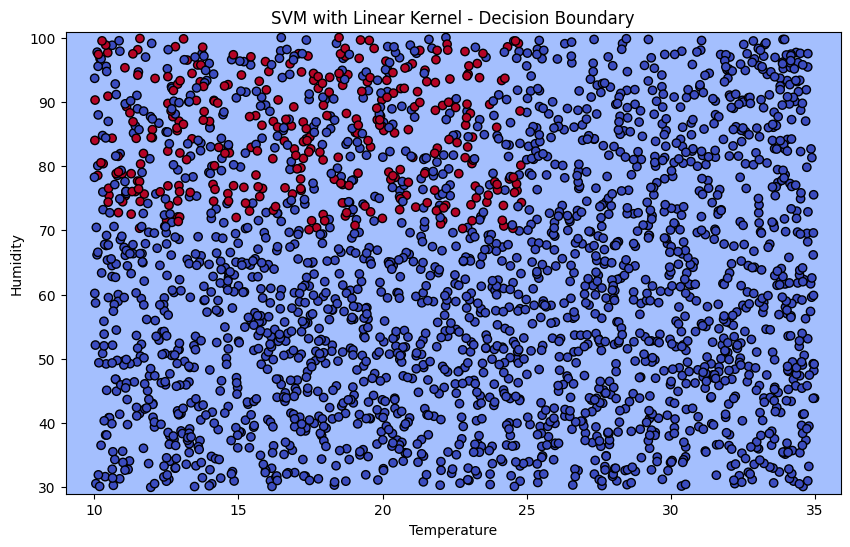

In [20]:
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_vis['Temperature'], X_vis['Humidity'], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.title("SVM with Linear Kernel - Decision Boundary")
plt.xlabel("Temperature")
plt.ylabel("Humidity")
plt.show()

In [21]:
rbf_svm = SVC(kernel='rbf', random_state=42)
rbf_svm.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [23]:
y_pred_rbf = rbf_svm.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
conf_matrix_rbf = confusion_matrix(y_test, y_pred_rbf)

In [24]:
print("\nRBF Kernel SVM")
print(f"Accuracy: {accuracy_rbf}")
print("Confusion Matrix:")
print(conf_matrix_rbf)


RBF Kernel SVM
Accuracy: 0.9706666666666667
Confusion Matrix:
[[651  11]
 [ 11  77]]
